<a href="https://colab.research.google.com/github/BatistaFelipe/Colab/blob/main/Teste_de_ping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# abre o arquivo
ping_csv = pd.read_csv('/content/ping.csv', encoding='utf-16')

In [ ]:
# troca os 'timeout' por 0
ping_csv['response_time'] = ping_csv['response_time'].replace('timeout', 25)
# converte a coluna 'response_time' para int
ping_csv['response_time'] = ping_csv['response_time'].astype(int)
# cria a coluna 'datetime' unificando o dia e hora
ping_csv['datetime'] = ping_csv['date'] + ' ' + ping_csv['time']
# converte a coluna 'datetime' pada o datatype correto
ping_csv['datetime'] = pd.to_datetime(ping_csv['datetime'])

In [ ]:
def makeMediaFromDataframe(filename, dataframe):
  final = pd.DataFrame(columns = ['hora', 'media'])

  for h1 in range(24):
    h2 = h1 + 1

    if h1 < 10:
      h1 = '0' + str(h1)
    if h2 < 10:
      h2 = '0' + str(h2)

    h1 = str(h1) + ':00'
    h2 = str(h2) + ':00'

    query = ('time > "%s" and time < "%s"' % (h1, h2))
    media = dataframe.query(query)['response_time'].mean()

    new_row = pd.DataFrame.from_records([{
        'hora': h1,
        'media': media
        }])

    final = pd.concat([final, new_row])

  # define o nome do eixo x
  plt.xlabel('hora')
  # define o nome do eixo y
  plt.ylabel('media')
  # define o tamanho do gráfico
  plt.rcParams['figure.figsize'] = [50, 10]
  # cria o grafico
  plt.plot(final['hora'], final['media'])
  # salva o arquivo com o gráfico
  plt.savefig(filename + '.png')

  return final

**TOTAL DE PACOTES**

In [ ]:
ping_csv['response_time'].count()

148317

**MEDIANA**

In [ ]:
ping_csv['response_time'].median()

23.0

**MÉDIA**

In [ ]:
ping_csv['response_time'].mean()

24.503974594955398

**VALOR MÁXIMO**

In [ ]:
ping_csv['response_time'].max()

139

**TIMEOUTS**

In [ ]:
ping_csv.query('dest == "Esgotado o tempo limite do pedido."')

,date,time,dest,bytes,response_time,ttl,datetime
216,11/10/2023,16:43,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-11-10 16:43:00
3756,11/10/2023,17:42,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-11-10 17:42:00
3984,11/10/2023,17:46,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-11-10 17:46:00
5327,11/10/2023,18:09,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-11-10 18:09:00
6447,11/10/2023,18:28,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-11-10 18:28:00
...,...,...,...,...,...,...,...
130854,13/10/2023,05:34,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-10-13 05:34:00
133081,13/10/2023,06:12,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-10-13 06:12:00
136019,13/10/2023,07:01,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-10-13 07:01:00
139300,13/10/2023,07:57,Esgotado o tempo limite do pedido.,NaN,25,NaN,2023-10-13 07:57:00


**PACOTES COM MAIS DE 40MS**

In [ ]:
ping_csv.query('response_time > 40')

,date,time,dest,bytes,response_time,ttl,datetime
982,11/10/2023,16:56,52.67.46.167,1200.0,44,241.0,2023-11-10 16:56:00
1133,11/10/2023,16:58,52.67.46.167,1200.0,44,241.0,2023-11-10 16:58:00
1365,11/10/2023,17:02,52.67.46.167,1200.0,41,241.0,2023-11-10 17:02:00
1426,11/10/2023,17:03,52.67.46.167,1200.0,57,241.0,2023-11-10 17:03:00
1506,11/10/2023,17:04,52.67.46.167,1200.0,41,241.0,2023-11-10 17:04:00
...,...,...,...,...,...,...,...
147377,13/10/2023,10:13,52.67.46.167,1200.0,53,241.0,2023-10-13 10:13:00
147404,13/10/2023,10:13,52.67.46.167,1200.0,41,241.0,2023-10-13 10:13:00
147829,13/10/2023,10:21,52.67.46.167,1200.0,45,241.0,2023-10-13 10:21:00
148159,13/10/2023,10:26,52.67.46.167,1200.0,44,241.0,2023-10-13 10:26:00


**MÉDIA DO DIA 11/10/2023**

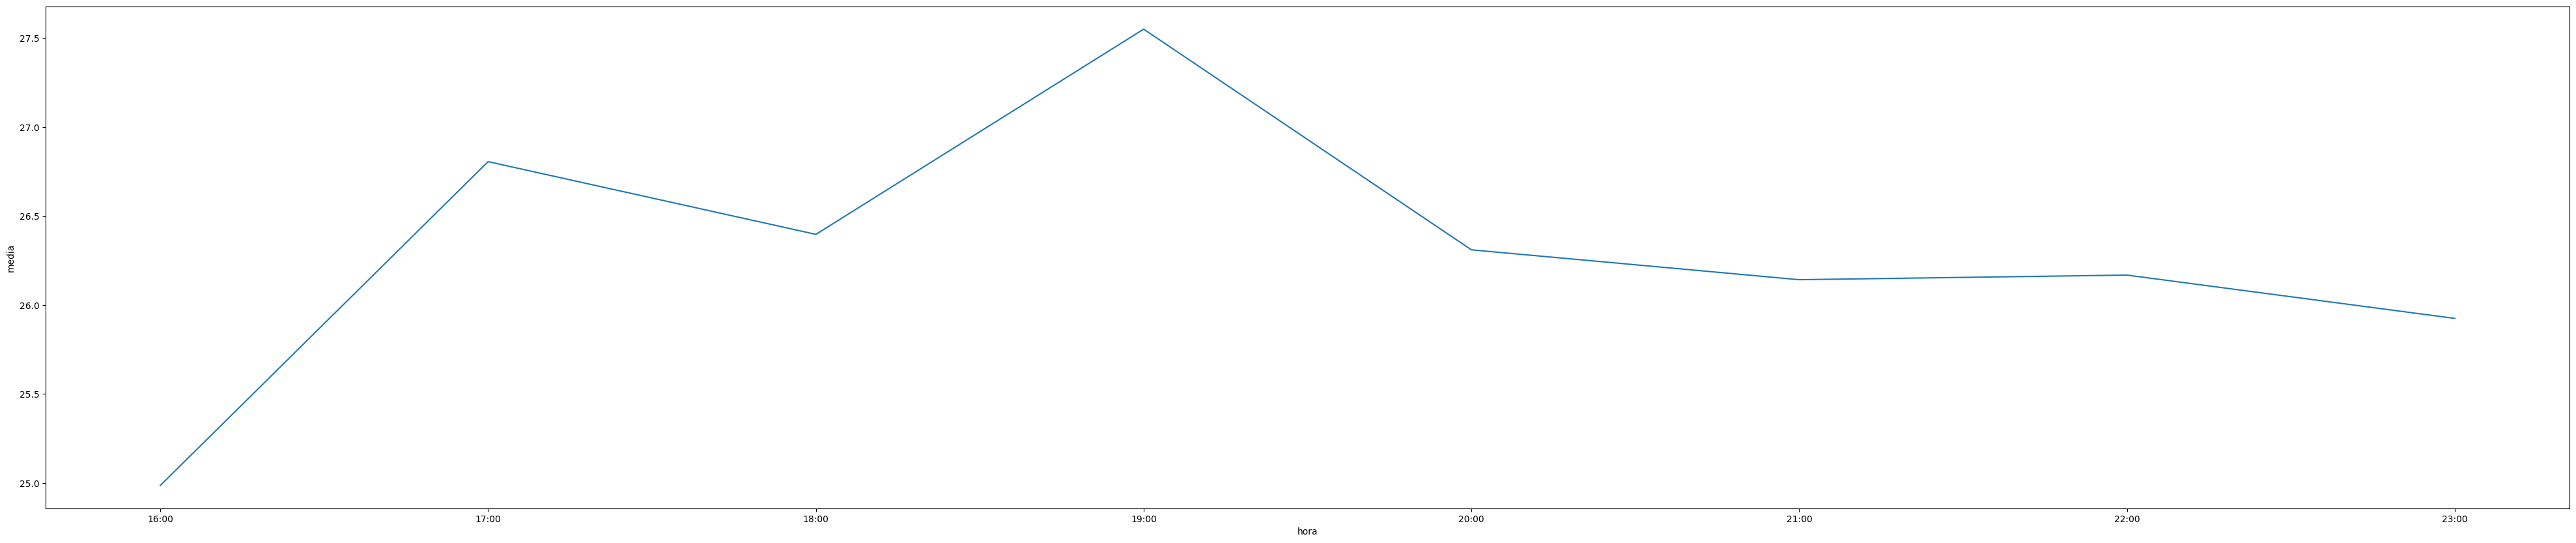

In [ ]:
media_ping_11102023 = makeMediaFromDataframe('ping_11102023',
                                             ping_csv.query('date == "11/10/2023"'))

**MÉDIA DO DIA 12/10/2023**

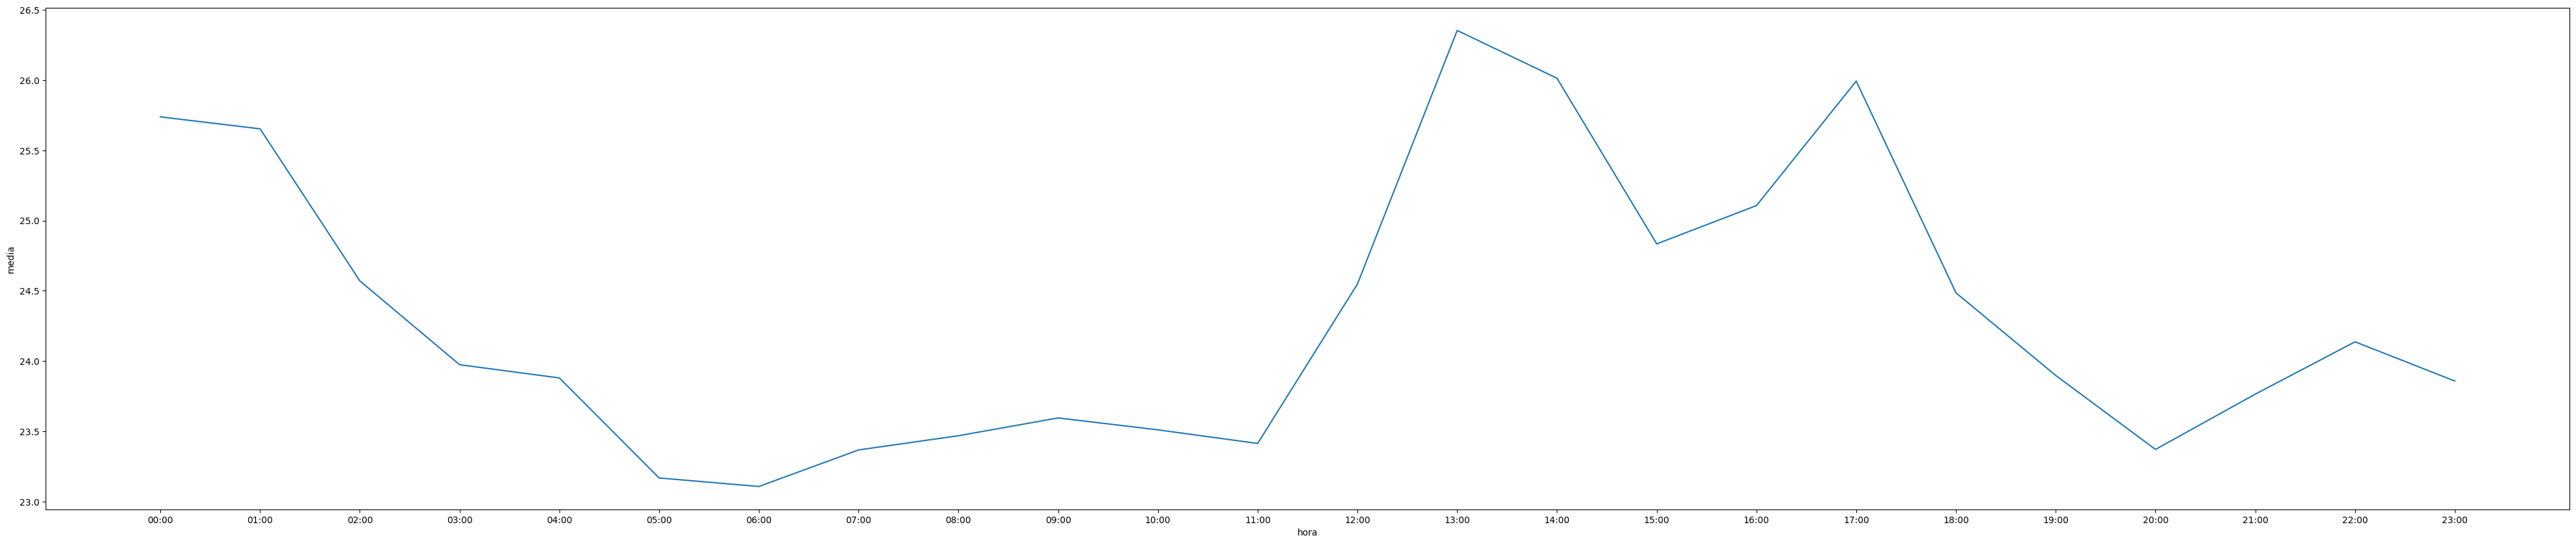

In [ ]:
media_ping_12102023 = makeMediaFromDataframe('ping_12102023',
                                             ping_csv.query('date == "12/10/2023"'))

**MÉDIA DO DIA 13/10/2023**

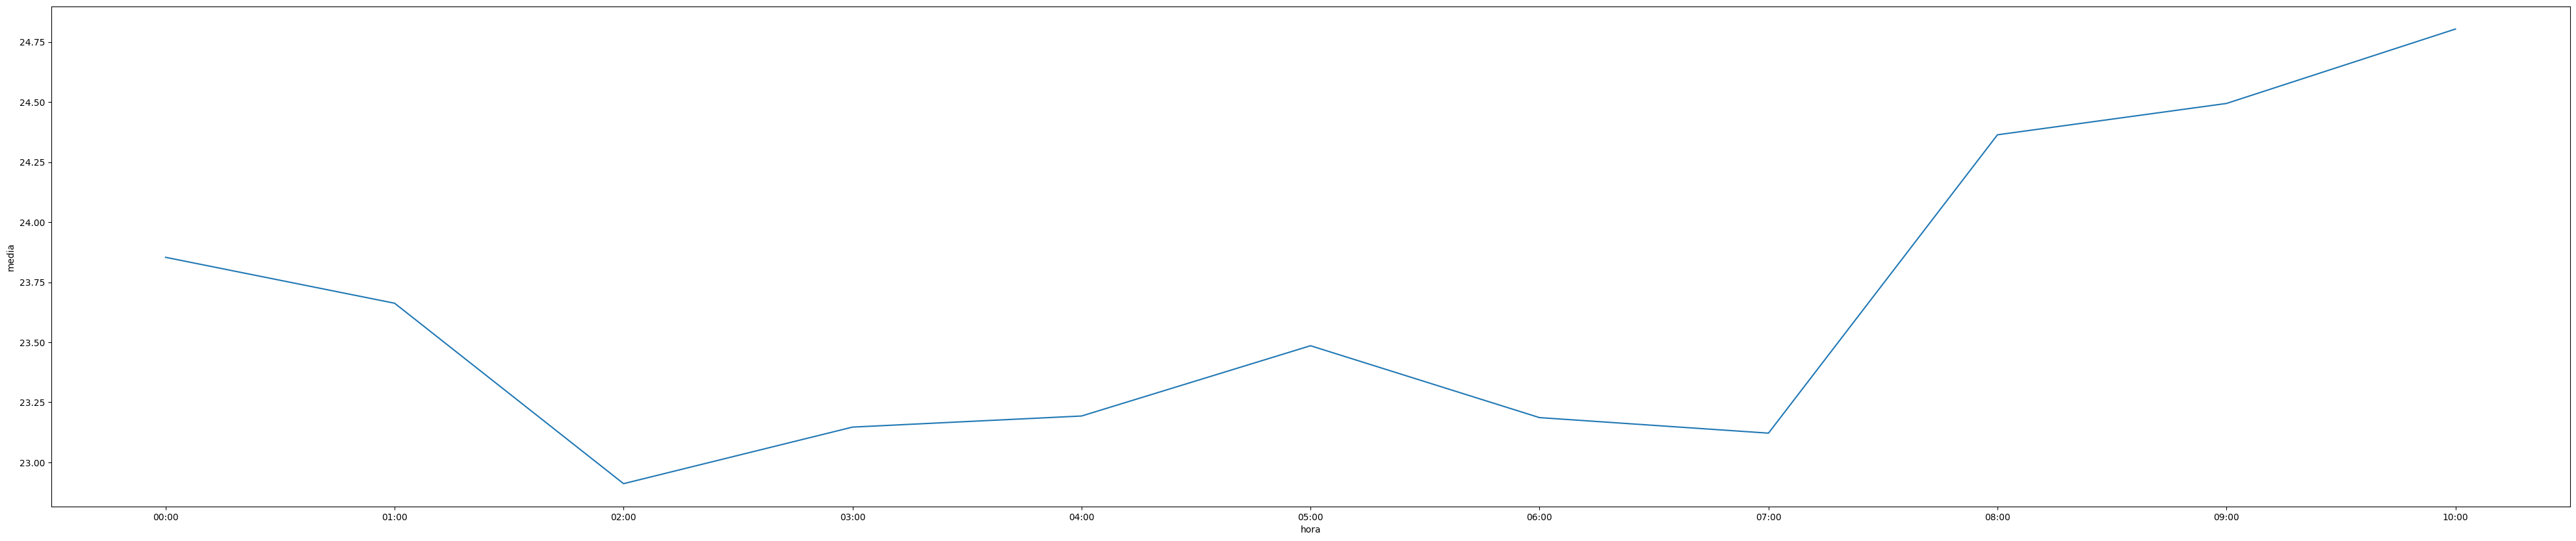

In [ ]:
media_ping_13102023 = makeMediaFromDataframe('ping_13102023',
                                             ping_csv.query('date == "13/10/2023"'))